<a href="https://colab.research.google.com/github/jabanitaha/data-mining-2-/blob/main/DBSCAN%20K%20DISTANCE%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

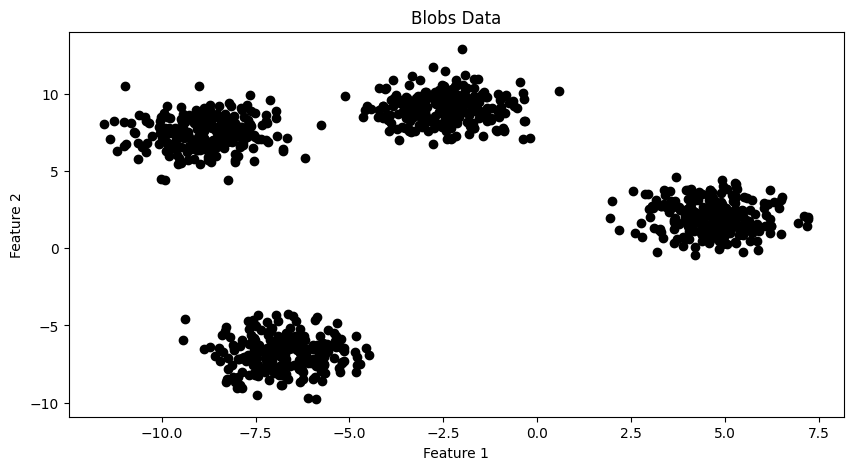

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, random_state=42)

# Visualize Core Data
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c='black')
plt.title('Blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

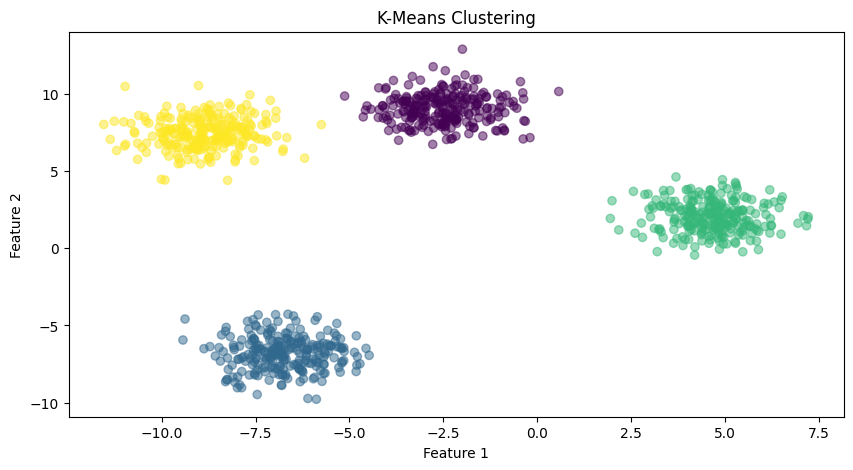

In [2]:
from sklearn.cluster import KMeans

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize K-Means clustering
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

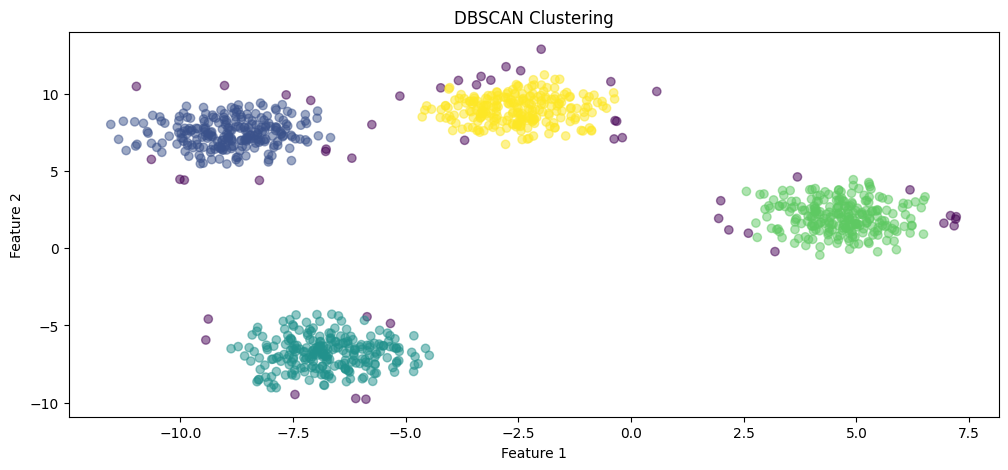

In [3]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=6)
dbscan_labels = dbscan.fit_predict(X)

# Visualize DBSCAN clustering
plt.figure(figsize=(12, 5))

plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

Ability to Identify Arbitrary Shapes
DBSCAN can identify clusters of arbitrary shapes, whereas K-Means assumes clusters to be spherical and isotropic.
This makes DBSCAN more suitable for datasets with clusters of irregular shapes or varying densities.

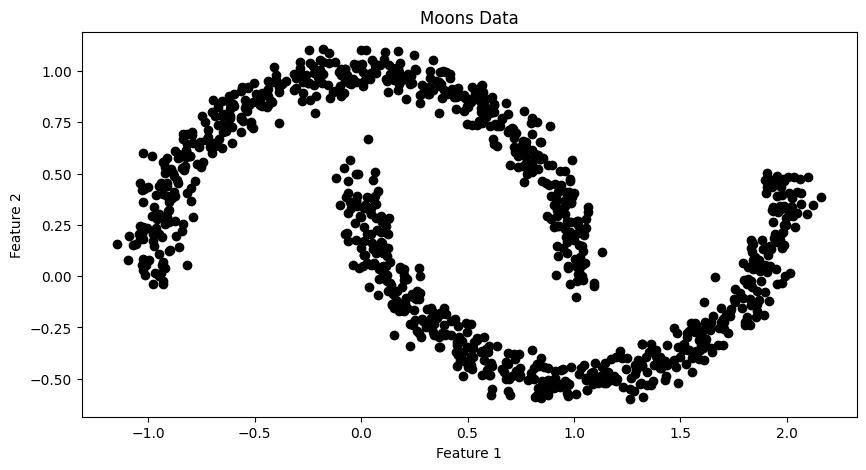

In [4]:
from sklearn.datasets import make_moons

# Generate synthetic data with two moon-shaped clusters
X, _ = make_moons(n_samples=1000, noise=0.06)

# Visualize Core Data
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c='black')
plt.title('Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

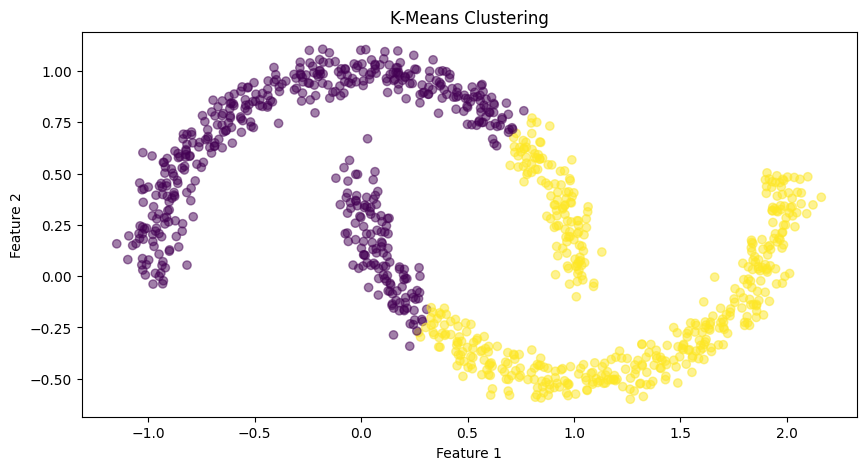

In [5]:
# K-Means clustering
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X)

# Visualize K-Means clustering
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

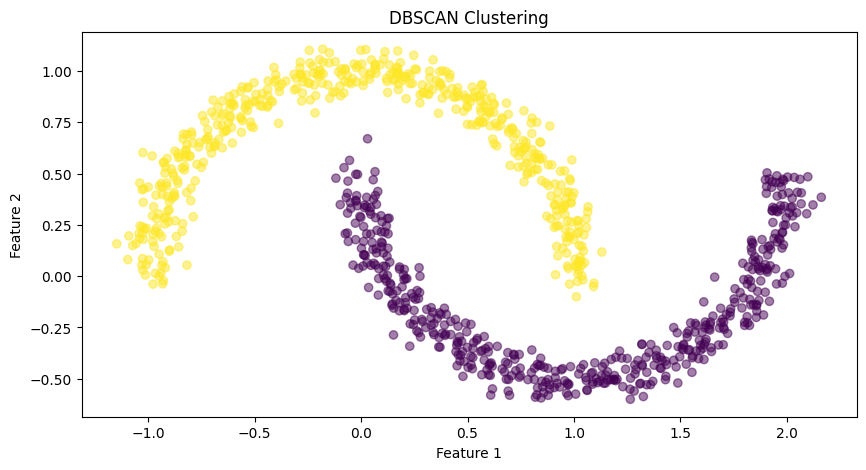

In [6]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Visualize DBSCAN clustering
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

Automatic Determination of Number of Clusters
DBSCAN automatically determines the number of clusters based on the data and the parameters ('eps' and 'min_samples').
In contrast, K-Means requires the user to specify the number of clusters beforehand, which may not always be known or may vary across datasets.
Less Sensitivity to Initialization:
K-Means clustering is sensitive to the initial choice of cluster centroids, which can lead to different final clustering results depending on the initialization.
DBSCAN, on the other hand, is less sensitive to initialization, as it defines clusters based on density rather than centroids.

DBSCAN Parameter Selection
To see changes in parameters, visit this site

MinPts:
MinPts specifies the minimum number of points required to form a dense region.
It's generally recommended that the minPts parameter should not be less than 3, this is because, DBSCAN requires at least three points (including the core point itself) to be within the ε-neighborhood of each core point.
If the dataset is noisy or contains outliers, a larger value of minPts may be necessary to ensure robust clustering.
eps:

When choosing the eps parameter in DBSCAN, it's essential to strike a balance between including enough points in each cluster and avoiding over-clustering or under-clustering.
If a small eps is chosen, it may result in many points not being assigned to any cluster, leading to under-clustering.
Conversely, if eps is too large, many points may be assigned to the same cluster, potentially leading to over-clustering.

You can Identify the Elbow Point

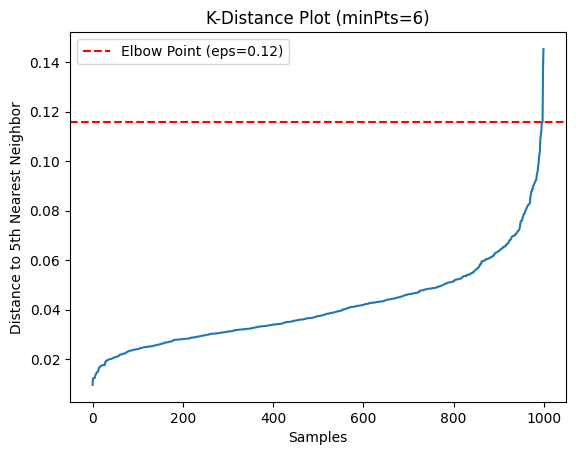

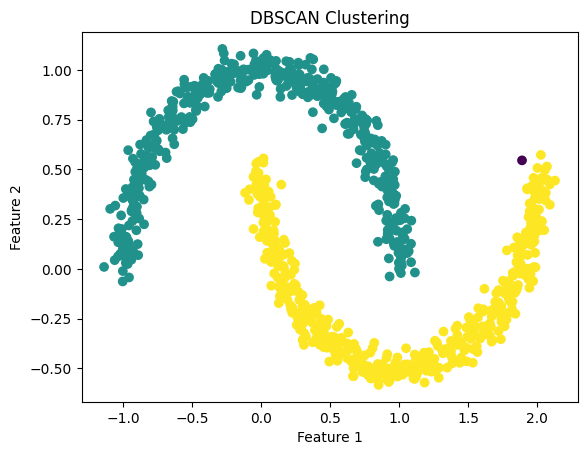

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors

# Function to compute the k-distance plot
def k_distance_plot(X, minPts):
    k = minPts - 1  # k is one less than minPts
    # Compute the distances to the k nearest neighbors for each point
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, _ = nbrs.kneighbors(X)
    # Sort the distances
    distances = np.sort(distances[:, -1])  # Select the distances to the k-th neighbor
    return distances

# Generate example data (replace with your own data if needed)
X, _ = make_moons(n_samples=1000, noise=0.05)

# Plot k-distance plot for minPts = 6
distances = k_distance_plot(X, minPts=6)

# We look for the point with the maximum change in distance
diff_distances = np.diff(distances, 2)  # Calculate second order difference
max_change_index = np.argmax(diff_distances) + 1  # Add 1 to account for the offset
eps = distances[max_change_index]  # Get the distance value at the identified index

# Plot the elbow point
plt.plot(distances)
plt.axhline(y=eps, color='red', linestyle='--', label=f'Elbow Point (eps={eps:.2f})')
plt.xlabel('Samples')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.title('K-Distance Plot (minPts=6)')
plt.legend()
plt.show()

# Perform DBSCAN clustering with chosen eps
dbscan = DBSCAN(eps=eps, min_samples=6)
labels = dbscan.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

Advantages:
DBSCAN is capable of identifying clusters of arbitrary shape and size, making it suitable for datasets with complex structures.

DBSCAN is robust to noise and outliers in the dataset. It achieves this by defining clusters as regions of high density separated by regions of low density, effectively ignoring noise points.

DBSCAN automatically determines the density of clusters based on the eps and minPts parameters. It does not require specifying the number of clusters beforehand, which can be challenging in many real-world datasets.

Disadvantages:
DBSCAN's performance is highly sensitive to the choice of parameters, particularly eps and minPts. Selecting optimal values for these parameters can be challenging and may require domain knowledge or experimentation.

Not deterministic as border points that is accessed by several clusters can be either a part of any cluster based on the order the data processed.

Fails at very high dimensional data due to curse of dimensionality.

DBSCAN algorithm is somewhat more difficult to tune contrasted to KMeans.